In [1]:
import matplotlib.pyplot as plt
from math import log2
import statistics as stat
import numpy as np
import scipy.stats

In [2]:
blockNum=3
with open(f'output{blockNum}.txt', 'r') as f:
    content = f.read()
data = eval(content)

def stdVariance(array):
    mean = sum(array) / len(array)
    var = sum([(a - mean)**2 for a in array]) / len(array)
    return var**0.5

avg = [stat.mean(a[1]) for a in data]
var = [stdVariance(a[1]) for a in data]
y1 = [avg[i] + 1*var[i] for i in range(len(avg))]
y2 = [avg[i] - 1*var[i] for i in range(len(avg))]
print(avg)
print(var)

[0.7174963711004266, 0.456010717557929, 0.2987715322696289, 0.2069437805218138, 0.15064912855091306, 0.11252134318690835, 0.07761502535842717, 0.05426920539658718, 0.037443295422196515, 0.025833987934280097, 0.018835138768199484, 0.01325054886998761, 0.009216946590471242]
[0.05219207750102808, 0.014336849391380031, 0.010697156542164254, 0.005763516118112234, 0.01019955421361747, 0.0038141993180138196, 0.0010947089962593923, 0.0017932226208438487, 0.0019308903319782975, 0.0008762137152570664, 0.0006364583309709526, 0.0007603444609718468, 0.00022409537560706558]


[0.7174963711004266, 0.456010717557929, 0.2987715322696289, 0.2069437805218138, 0.15064912855091306, 0.11252134318690835, 0.07761502535842717, 0.05426920539658718, 0.037443295422196515, 0.025833987934280097, 0.018835138768199484, 0.01325054886998761, 0.009216946590471242]


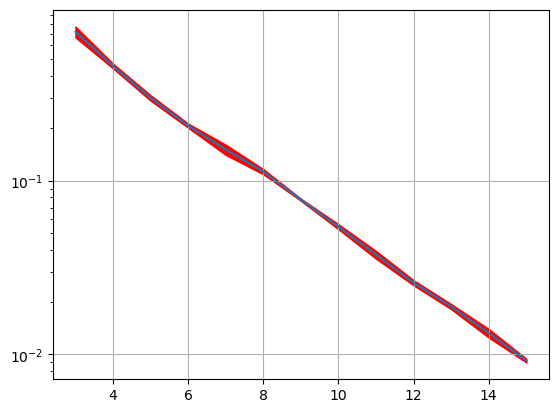

In [3]:
x = [log2(a[0]) for a in data]
y = avg
print(y)
plt.plot(x,y)
plt.yscale("log")
plt.scatter(x,y)
plt.fill_between(x, y1, y2, color='red')
plt.grid()
plt.show()


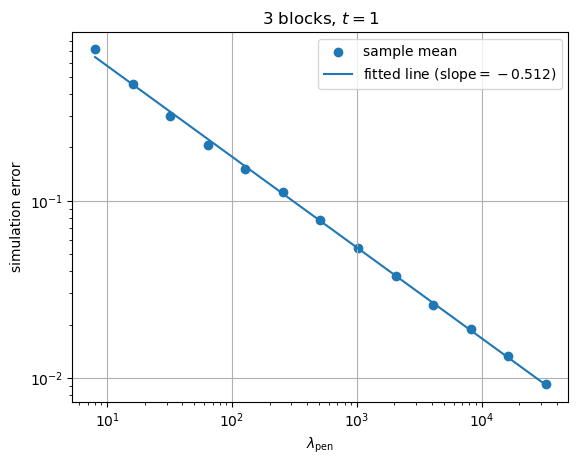

In [4]:
x = np.array([a[0] for a in data])
y = np.array(avg)
plt.scatter(x, y, label="sample mean")

lr = scipy.stats.linregress(np.log(x), np.log(y))
plt.plot(x, np.exp(lr.slope * np.log(x) + lr.intercept),
             label='fitted line (slope$={:.3f}$)'.format(lr.slope))

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\lambda_{\mathrm{pen}}$")
plt.ylabel("simulation error")
plt.title(r"3 blocks, $t=1$")
plt.legend()
plt.grid()
plt.show()